In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading a data frame
df =pd.read_spss("ATP W49.sav")

In [795]:
#showing first few observations
df.head()

,QKEY,DEVICE_TYPE_W49,LANG_W49,FORM_W49,SOCMEDIAUSEa_W49,SOCMEDIAUSEb_W49,SOCMEDIAUSEc_W49,SOCMEDIAUSEd_W49,SNSUSER_W49,ELECTFTGSNSINT_W49,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W49
0,100260.0,Tablet,English,Form 2,"No, do not use this","No, do not use this","No, do not use this","No, do not use this",Does not use social media,NaN,...,Republican,NaN,Rep/Lean Rep,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Accesses Internet by paying a cell phone compa...,No,0.308756
1,100588.0,Mobile phone,English,Form 1,"Yes, use this","Yes, use this","Yes, use this","No, do not use this",Social media user,I am worn out by how many political posts and ...,...,Democrat,NaN,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses Internet by paying a cell phone compa...,No,0.417927
2,100637.0,Desktop,English,Form 1,"Yes, use this","No, do not use this","No, do not use this","No, do not use this",Social media user,I am worn out by how many political posts and ...,...,Independent,The Republican Party,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Accesses Internet by paying a cell phone compa...,No,0.590463
3,101224.0,Mobile phone,English,Form 2,"Yes, use this","No, do not use this","No, do not use this","No, do not use this",Social media user,I am worn out by how many political posts and ...,...,Republican,NaN,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Accesses Internet by paying a cell phone compa...,Yes,0.393867
4,101322.0,Mobile phone,English,Form 1,"Yes, use this","No, do not use this","No, do not use this","No, do not use this",Social media user,I am worn out by how many political posts and ...,...,Republican,NaN,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are NOT registered to vote at your current...,Conservative,Accesses Internet by paying a cell phone compa...,No,1.236273


In [796]:
#checking the dimension
df.shape

(4272, 143)

In [797]:
#looking at the variables with highest percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_df = missing_value_df.sort_values(by ='percent_missing',ascending=False )
missing_df[missing_df['percent_missing'] > 50.0].count()


column_name        36
percent_missing    36
dtype: int64

In [798]:
#lookign at the top 10 variables with the highest percentage of missing values
missing_df.head(10)

,column_name,percent_missing
HOMEASSIST5b_W49,HOMEASSIST5b_W49,87.687266
HOMEASSIST5a_W49,HOMEASSIST5a_W49,87.336142
HOMEASSIST2_W49,HOMEASSIST2_W49,75.023408
HOMEASSIST4_W49,HOMEASSIST4_W49,75.023408
HOMEASSIST3_W49,HOMEASSIST3_W49,75.023408
CONCERNGRPc_W49,CONCERNGRPc_W49,69.264981
F_PARTYLN_FINAL,F_PARTYLN_FINAL,62.031835
CONCERNGRPf_W49,CONCERNGRPf_W49,59.550562
TALKCMNSNSINT_W49,TALKCMNSNSINT_W49,59.550562
CONTROLGRPa_W49,CONTROLGRPa_W49,58.590824


In [7]:
#values "Refused' are basically missing values and I will replace them with NaN
df = df.replace('Refused',np.nan)

In [8]:
#looking at the target variable and its unique values
df['SHARE1_W49'].unique()

[No, have not done this, Yes, have done this, NaN]
Categories (2, object): [No, have not done this, Yes, have done this]

In [9]:
#removing the missing values for the target variable
dfr = df.dropna(how='any', subset=['SHARE1_W49'])


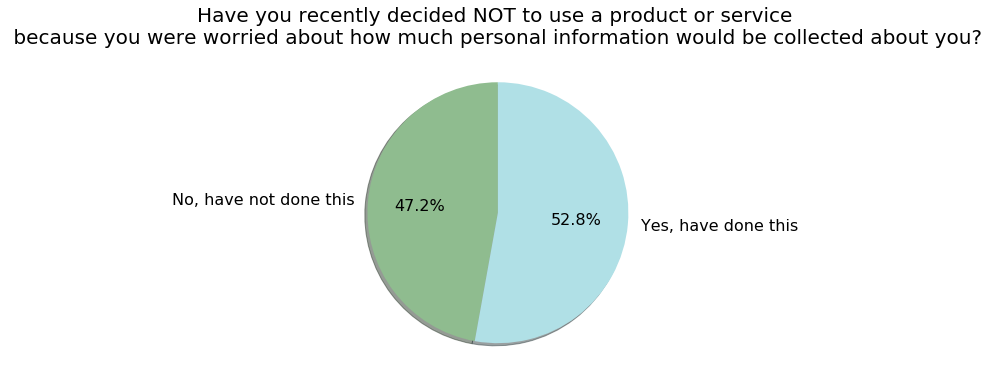

In [10]:
#creating a pie chart for  the target variable to see how balanced the 2 classes are
import matplotlib.pyplot as plt
share1= dfr['SHARE1_W49']
colors = ['darkseagreen', 'powderblue']
keys, counts = np.unique(share1, return_counts=True)
plt.figure(figsize=(12,6))
plt.pie(counts, labels=keys,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.rcParams['font.size'] = 25
plt.title("Have you recently decided NOT to use a product or service \n because you were worried about how much personal information would be collected about you? ", fontsize=20)
plt.show()

"Yes" is a more popular answer, yet the number of people who responded "no" is not that much smaller.

In [11]:
#subsetting the data
newdf=dfr[['SHARE1_W49', 'F_AGECAT']]
newdf = newdf[newdf.SHARE1_W49 != 'Refused']
newdf = newdf[newdf.F_AGECAT != 'DK/REF']

In [12]:
#grouping the data 
plottable = newdf.groupby([ 'F_AGECAT', 'SHARE1_W49']).size().unstack()

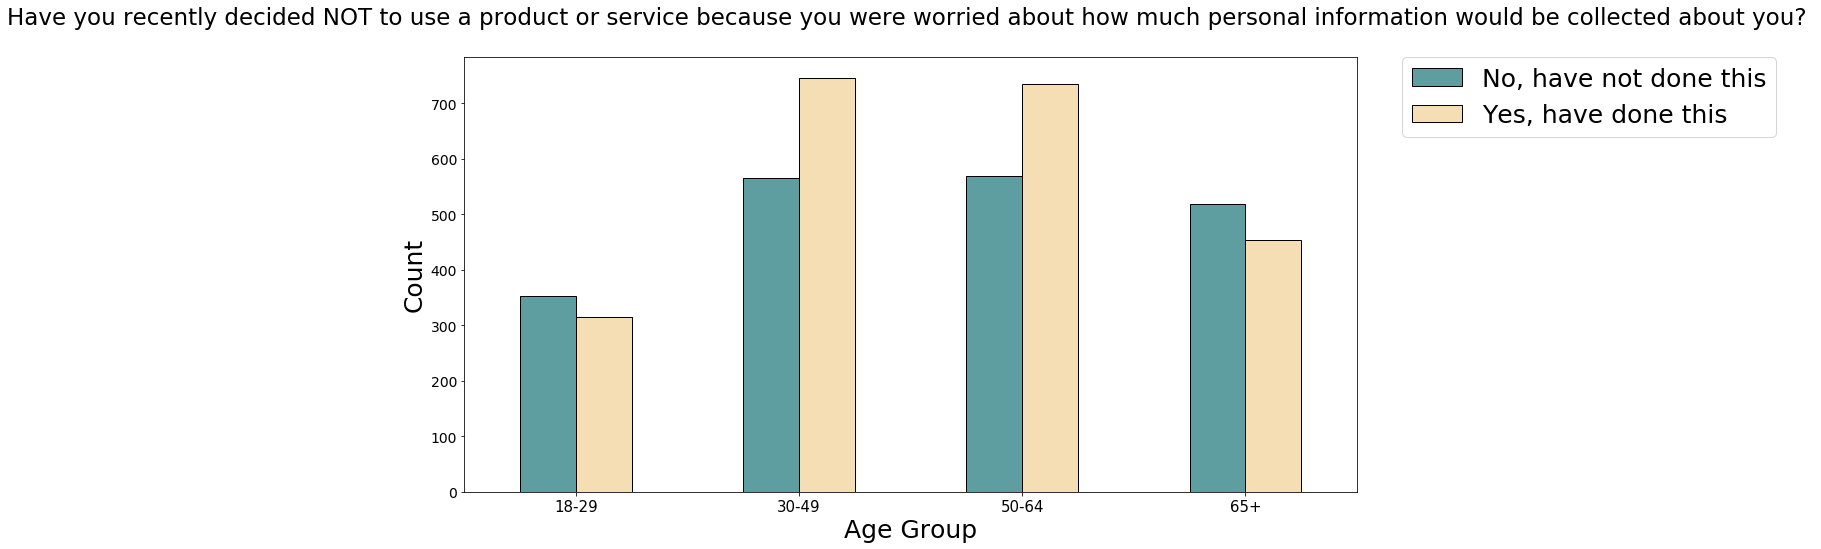

In [13]:
#looking at some of the demographics
colors = ['cadetblue', 'wheat']
ax = plottable.plot(kind='bar', color = colors, edgecolor='black',fontsize=14, figsize=(16,8))
#customizing the title
ax.set_title("Have you recently decided NOT to use a product or service because you were worried about how much personal information would be collected about you? \n", fontsize=23)
#customizing x label
ax.set_xlabel('Age Group', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

It looks like age groups 18-29 and 65+ opted out of service over personal data collection more, than age groups 30-49 and 50-64.

In [14]:
stackdata= df[['F_METRO','SHARE1_W49' ]]
stackdata = stackdata[stackdata.SHARE1_W49 != 'Refused']
stackdata = stackdata[stackdata.F_METRO != 'Refused']
plottableloyalty = stackdata.groupby(['F_METRO','SHARE1_W49']).size().unstack()

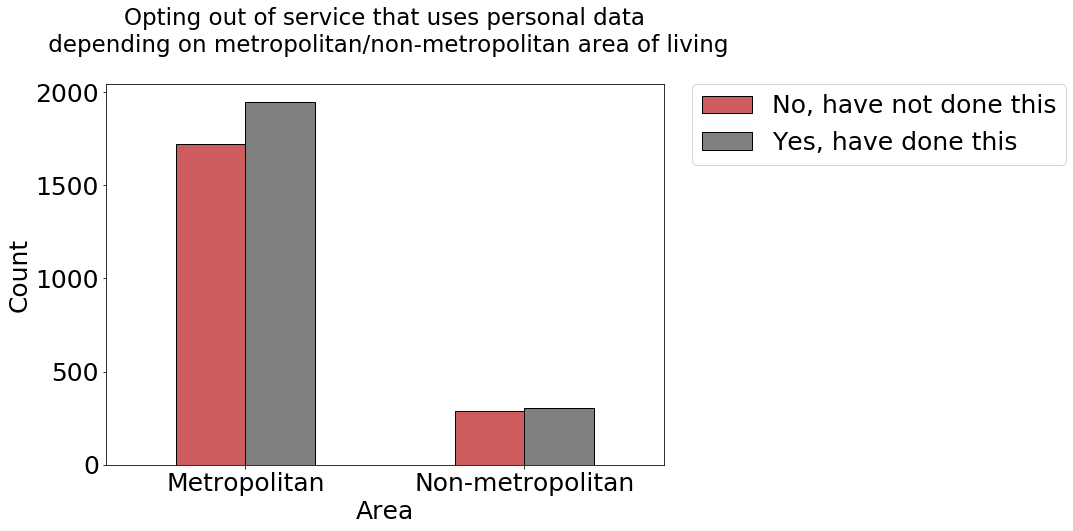

In [40]:
# comparing the response to the question of whether people opted out of service because of their personal data use
# based on whether they live in the metropolitan are or non-metropolitan area.
colors = ['indianred', 'grey']
ax = plottableloyalty.plot(kind='bar',color = colors, edgecolor='black', figsize=(10,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("Opting out of service that uses personal data\n depending on metropolitan/non-metropolitan area of living\n", fontsize=23)
#customizing x label
ax.set_xlabel('Area', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0);

Respondents living in metropolitan area have opted out of a service that uses personal data slightly more.

In [33]:
#checking the number of respondents using social media
stackdata= df[['SNSUSER_W49','SHARE1_W49' ]]
stackdata = stackdata[stackdata.SHARE1_W49 != 'Refused']
stackdata = stackdata[stackdata.SNSUSER_W49 != 'Refused']
plottablesocialm = stackdata.groupby(['SNSUSER_W49','SHARE1_W49']).size().unstack()
plottablesocialm 

SHARE1_W49,"No, have not done this","Yes, have done this"
SNSUSER_W49,,
Does not use social media,385,383
Social media user,1622,1866


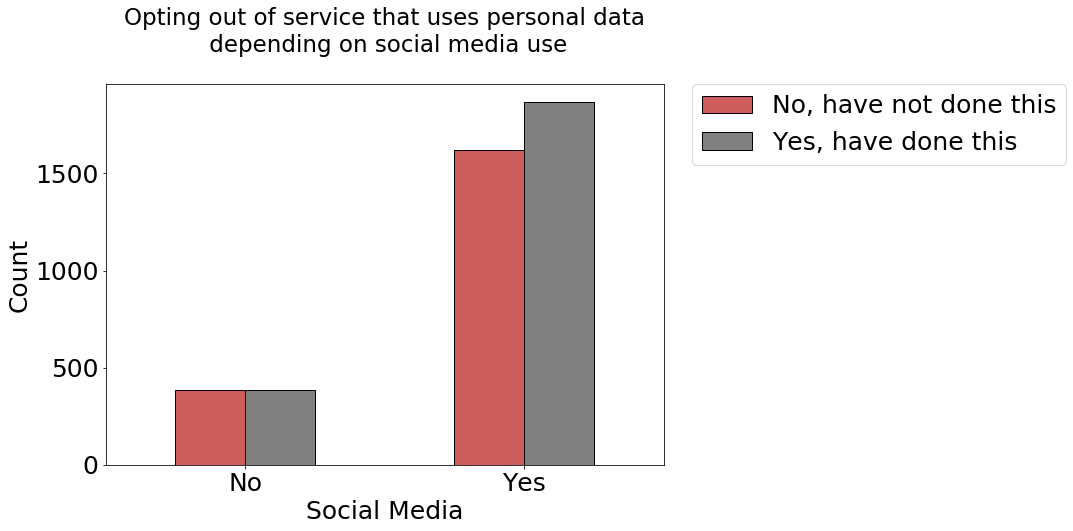

In [34]:
# comparing the response to the question of whether people opted out of service because of their personal data use
# based on whether they use social mdeia or not
colors = ['indianred', 'grey']
ax = plottablesocialm.plot(kind='bar',color = colors, edgecolor='black', figsize=(10,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("Opting out of service that uses personal data\n depending on social media use\n", fontsize=23)
#customizing x label
ax.set_xlabel('Social Media', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25)
labels = [r'No', r'Yes']
ax.set_xticklabels(labels)
plt.xticks(rotation=0);

More people that use social media opted out of service because of personal data use

In [32]:
#looking at the education variable
stackdata= df[['F_EDUCCAT','SHARE1_W49' ]]
stackdata = stackdata[stackdata.SHARE1_W49 != 'Refused']
stackdata = stackdata[stackdata.F_EDUCCAT != "Don't know/Refused"]
plottableinternet = stackdata.groupby(['F_EDUCCAT','SHARE1_W49']).size().unstack()
plottableinternet

SHARE1_W49,"No, have not done this","Yes, have done this"
F_EDUCCAT,,
College graduate+,720,877
H.S. graduate or less,771,705
Some College,515,661


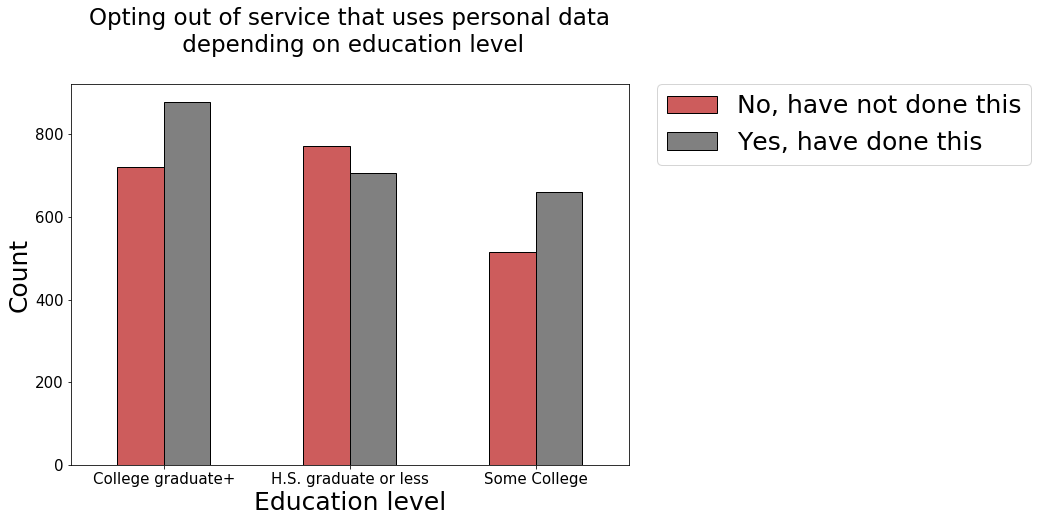

In [39]:
# comparing the response to the question of whether people opted out of service because of their personal data use
# based on their education level
colors = ['indianred', 'grey']
ax = plottableinternet.plot(kind='bar',color = colors, edgecolor='black', figsize=(10,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("Opting out of service that uses personal data\n depending on education level\n", fontsize=23)
#customizing x label
ax.set_xlabel('Education level', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25)
#labels = [r'Yes', r'No']
#ax.set_xticklabels(labels)
plt.yticks(rotation=0, fontsize = 15);
plt.xticks(rotation=0, fontsize = 15);

People with Graduate and some college degree opted out of use of service because of personal data use more than those having High School Diploma or less

In [41]:
import warnings
warnings.filterwarnings('ignore')
dfr['GOVREGV1_W49'] = dfr['GOVREGV1_W49'].str.replace('Refused?' , '')

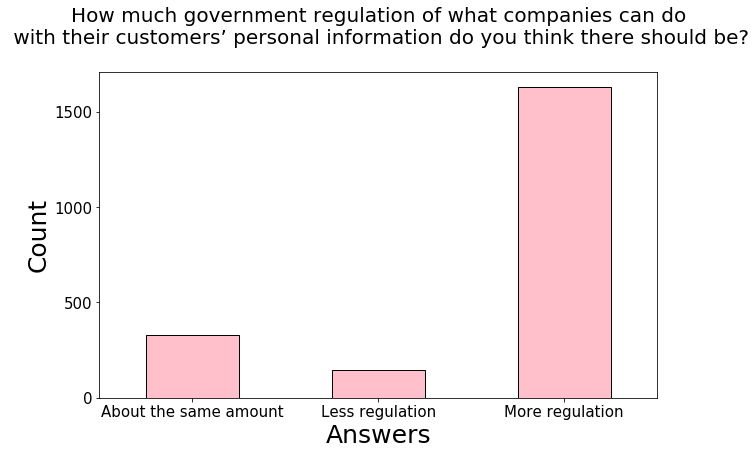

In [57]:
#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.GOVREGV1_W49.value_counts().sort_index().plot(kind='bar',color = 'pink', edgecolor='black', fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("How much government regulation of what companies can do\n with their customers’ personal information do you think there should be?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()


Overwhelming support for the need of more regulation has been expressed by the respondents

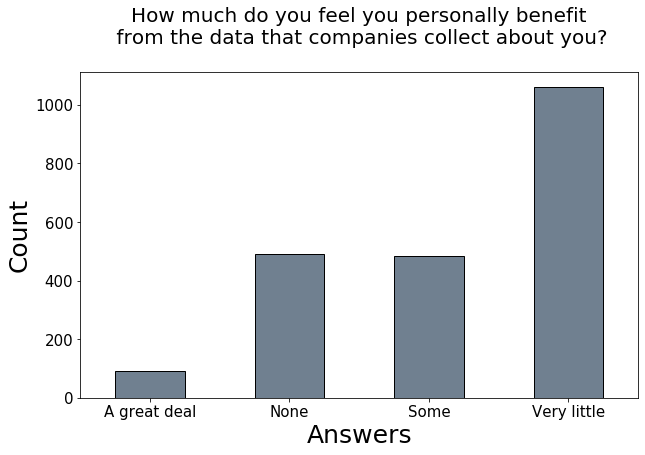

In [46]:
# checking whether respondents believe there is benefit in using data
dfr['BENEFITCO_W49'] = dfr['BENEFITCO_W49'].str.replace('Refused?' , '')#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.BENEFITCO_W49.value_counts().sort_index().plot(kind='bar',color = 'slategrey', edgecolor='black', fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("How much do you feel you personally benefit\n from the data that companies collect about you?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()

Most of the respondents believe there is very little benefit from the data that companies collect

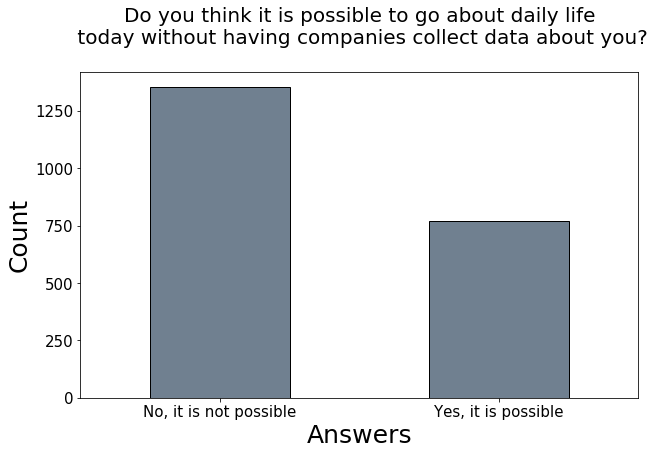

In [45]:
#checking what respondents think about importance of data in daily life
dfr['ANONYMOUS1CO_W49'] = dfr['ANONYMOUS1CO_W49'].str.replace('Refused?' , '')#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.ANONYMOUS1CO_W49.value_counts().sort_index().plot(kind='bar',color = 'slategrey', edgecolor='black', fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("Do you think it is possible to go about daily life\n today without having companies collect data about you?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()

More respondents believe it is not possible to go about daily life without data collection

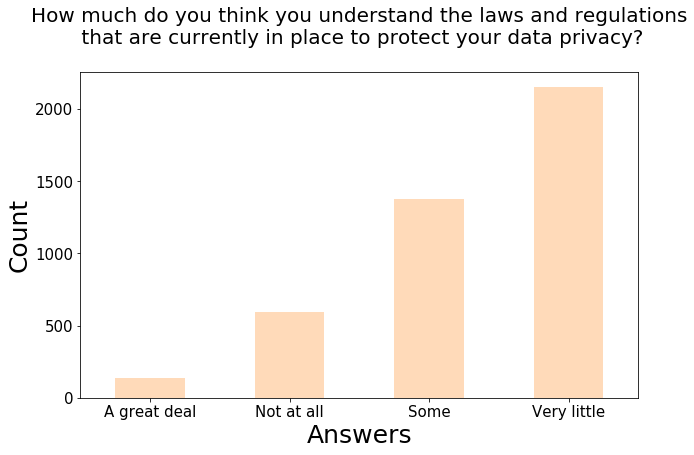

In [50]:
#checking how much people understand the laws
dfr['PRIVACYREG_W49'] = dfr['PRIVACYREG_W49'].str.replace('Refused?' , '')#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.PRIVACYREG_W49.value_counts().sort_index().plot(kind='bar',color = 'peachpuff',  fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("How much do you think you understand the laws and regulations\n that are currently in place to protect your data privacy?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()

Most of the respondents have very little understanding of the laws and regulations that are currently in place to protect data privacy

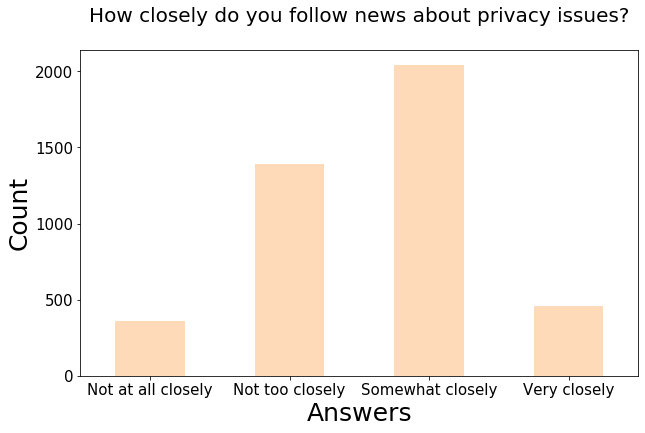

In [53]:
#checking how closely respondents follow the news about privacy issues
dfr['PRIVACYNEWS1_W49'] = dfr['PRIVACYNEWS1_W49'].str.replace('Refused?' , '')#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.PRIVACYNEWS1_W49.value_counts().sort_index().plot(kind='bar',color = 'peachpuff',  fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("How closely do you follow news about privacy issues?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()

Most of the respondents follow the news about data privacy somewhat closely

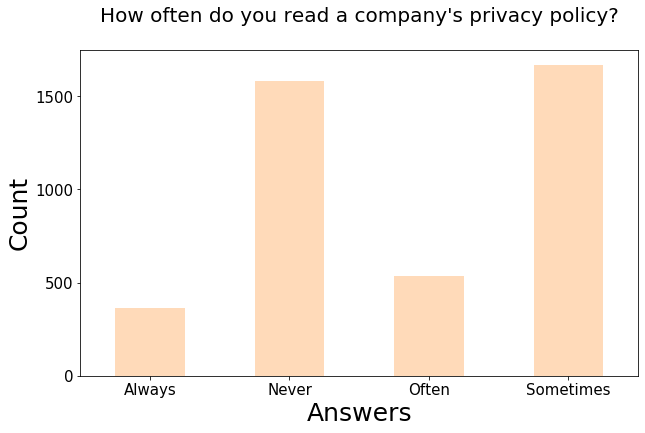

In [56]:
#checking how often the respondents read comapny's privacy policies
dfr['PP2_W49'] = dfr['PP2_W49'].str.replace('Refused?' , '')#creating a bar plot to see whether people are satisfied with the level of regulation of personal data use that is currently used
ax = dfr.PP2_W49.value_counts().sort_index().plot(kind='bar',color = 'peachpuff',  fontsize=14, figsize=(10,6))
#customizing the title
ax.set_title("How often do you read a company's privacy policy?\n", fontsize=20)
#customizing x label
ax.set_xlabel('Answers', fontsize=25)
#customizing y label
ax.set_ylabel('Count', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);
plt.yticks( fontsize = 15);
plt.show()

Most of the respondents only sometimes read the privacy policy and a lot of the respondents do not read it a lot

In [55]:
dfr['PPP2_W49'].unique()

array(['Never', 'Sometimes', 'Always', 'Often', nan], dtype=object)

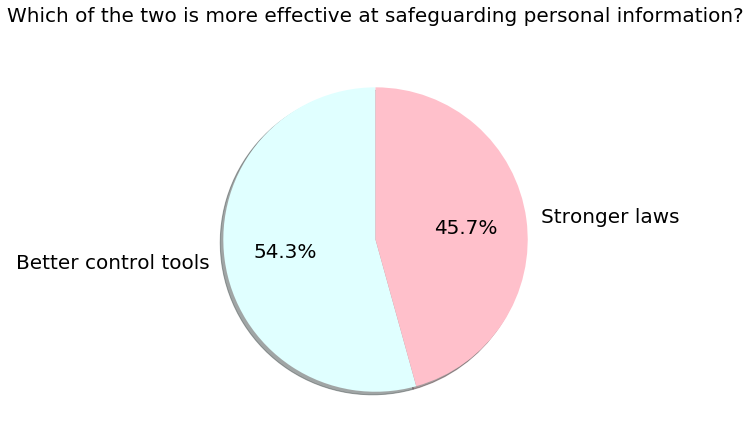

In [386]:
#creating a pie chart to see if people have stronger need for
#better tools for allowing people to control their personal information themselves, 
#or stronger laws
df = df.replace('Refused',np.nan)
dfra = df.dropna(how='any', subset=['GOVREGV2_W49'])
share1= dfra['GOVREGV2_W49']
colors = ['lightcyan', 'pink']
labels = [r'Better control tools', r'Stronger laws']
keys, counts = np.unique(share1, return_counts=True)
plt.figure(figsize=(14,7))
plt.pie(counts, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 20})
plt.rcParams['font.size'] = 25
plt.title("Which of the two is more effective at safeguarding personal information?\n ", fontsize=20)
plt.show()

Better tools for allowing people to control their personal information themselves is a more popular choice.

In [387]:
#creating a pivot about people's concern about amount of information used by the groups presented below 
dfconcern = dfr[["CONCERNGRPa_W49","CONCERNGRPb_W49","CONCERNGRPc_W49","CONCERNGRPd_W49","CONCERNGRPe_W49","CONCERNGRPf_W49" ]]
newlist = []
for column in dfconcern:
    grouped = dfconcern.groupby(column)
    newlist.append(grouped.size())
names = ['enforcement agencies', 'advertisers', 'your employer', 'companies you buy things from', 'friends and family', 'media sites you use']
data=pd.DataFrame(newlist, index= names)
data.drop(['Refused'], axis=1, inplace = True)
data.style.set_caption('Level of concern about amount of information the following people or groups know')

,Concerned a little,Concerned a lot,Not concerned
enforcement agencies,758,509,864
advertisers,954,844,331
your employer,506,251,545
companies you buy things from,1072,648,400
friends and family,723,194,1204
media sites you use,783,701,239


The highest concern is about how much information advertisers know, followed by media sites you use and companies you buy things from. 

How comfortable are you, if at all, with companies using your personal data in the following ways?


In [388]:
#creating a table by grouping various variables by the unique values (same answers)
dfcomfort = dfr[["PP6a_W49","PP6b_W49","PP6c_W49" ]]
newlist2 = []
for column in dfcomfort:
    grouped = dfcomfort.groupby(column)
    newlist2.append(grouped.size())
names = ['To help improve their fraud prevention systems', 'Sharing it with outside groups doing research that might help improve society', 'To help them develop new products']
data=pd.DataFrame(newlist2, index= names)
data.drop(['Refused'], axis=1, inplace = True)
data.style.set_caption('How comfortable are you, if at all, with companies using your personal data in the following ways?')

,Not comfortable at all,Not too comfortable,Somewhat comfortable,Very comfortable
To help improve their fraud prevention systems,564,1260,1978,432
Sharing it with outside groups doing research that might help improve society,1155,1601,1272,212
To help them develop new products,742,1387,1803,305


People are most comfortable if their personal data is used for fraud prevention. 

In [389]:
#creating a table to reflect the popularity of social networks
dfsocial = dfr[["SOCMEDIAUSEa_W49",  "SOCMEDIAUSEb_W49", "SOCMEDIAUSEc_W49","SOCMEDIAUSEd_W49"]]
newlistsocial = []
for column in dfsocial:
    grouped = dfsocial.groupby(column)
    newlistsocial.append(grouped.size())
newnames = ['Facebook', 'Instagram', 'Twitter', 'Other']
datasocial=pd.DataFrame(newlistsocial, index= newnames)
datasocial.drop(['Refused', "No, do not use this"], axis=1, inplace = True)
datasocial.rename(columns={"Yes, use this": "Number of users"})

,Number of users
Facebook,3107
Instagram,1555
Twitter,923
Other,1179


The most popular social network is Facebook.

In [671]:
#creating a table to reflect how the respondents have been recently affected by data miuse
dfwhy = df[['DB1a_W49', 'DB1b_W49', 'DB1c_W49']]
newlistwhy = []
for column in dfwhy:
    grouped = dfwhy.groupby(column)
    newlistwhy.append(grouped.size())
newnames = ['Fraudulent charges', 'hacked social media/email', ' a line of credit or a loan']
datawhy=pd.DataFrame(newlistwhy, index= newnames)
datawhy.drop(['Refused', "Offline: does not have internet", "No"], axis=1, inplace = True)
datawhy.astype(int)
(100. * datawhy / 4254).round(0)
datan = datawhy.rename(columns={"Yes": "% of respondents"})
datam = (100. * datan / 4254).round(0)
datam

,% of respondents
Fraudulent charges,22.0
hacked social media/email,8.0
a line of credit or a loan,6.0


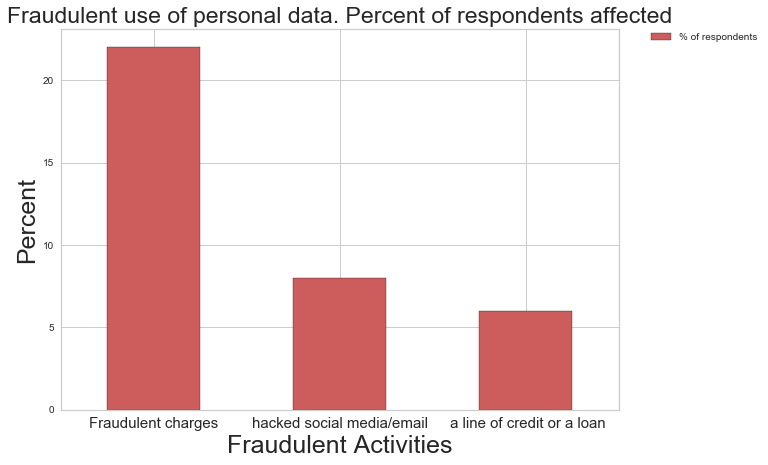

In [673]:
colors = ['indianred', 'grey']
ax = datam.plot(kind='bar',color = colors, edgecolor='black', figsize=(10,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("Fraudulent use of personal data. Percent of respondents affected", fontsize=23)
#customizing x label
ax.set_xlabel('Fraudulent Activities', fontsize=25)
#customizing y label
ax.set_ylabel('Percent', fontsize=25);
plt.xticks(rotation=0, fontsize = 15);

22% of respondents experienced fraudulent charges. Overall, 36% of respondents have been affected by some kind of data misuse

In [360]:
#checking the names of the variables. Additional variable analysis was performed in R
list(df)

['QKEY',
 'DEVICE_TYPE_W49',
 'LANG_W49',
 'FORM_W49',
 'SOCMEDIAUSEa_W49',
 'SOCMEDIAUSEb_W49',
 'SOCMEDIAUSEc_W49',
 'SOCMEDIAUSEd_W49',
 'SNSUSER_W49',
 'ELECTFTGSNSINT_W49',
 'TALKDISASNSINT_W49',
 'TALKCMNSNSINT_W49',
 'SECUR1_W49',
 'PRIVACYNEWS1_W49',
 'HOMEASSIST1_W49',
 'HOMEASSIST2_W49',
 'HOMEASSIST3_W49',
 'HOMEASSIST4_W49',
 'HOMEASSIST5a_W49',
 'HOMEASSIST5b_W49',
 'HOMEIOT_W49',
 'FITTRACK_W49',
 'LOYALTY_W49',
 'DNATEST_W49',
 'TRACKCNT_W49',
 'TRACKCO1a_W49',
 'TRACKCO1b_W49',
 'CONCERNCO_W49',
 'BENEFITCO_W49',
 'CONTROLCO_W49',
 'UNDERSTANDCO_W49',
 'POSNEGCO_W49',
 'ANONYMOUS1CO_W49',
 'TRACKGOV1a_W49',
 'TRACKGOV1b_W49',
 'CONCERNGOV_W49',
 'BENEFITGOV_W49',
 'CONTROLGOV_W49',
 'UNDERSTANDGOV_W49',
 'POSNEGGOV_W49',
 'ANONYMOUS1GOV_W49',
 'CONCERNGRPa_W49',
 'CONCERNGRPb_W49',
 'CONCERNGRPc_W49',
 'CONCERNGRPd_W49',
 'CONCERNGRPe_W49',
 'CONCERNGRPf_W49',
 'CONTROLGRPa_W49',
 'CONTROLGRPb_W49',
 'CONTROLGRPc_W49',
 'CONTROLGRPd_W49',
 'CONTROLGRPe_W49',
 'CONTROLGR

In [3]:
#creating a subset of varaibles where all of the participants provided answers
dfall= df[['TRACKCNT_W49','SOCMEDIAUSEa_W49', 'SOCMEDIAUSEb_W49', 'SOCMEDIAUSEc_W49', 'SOCMEDIAUSEd_W49','SNSUSER_W49','SECUR1_W49','PRIVACYNEWS1_W49','HOMEASSIST1_W49','FITTRACK_W49', 'LOYALTY_W49', 'DNATEST_W49','HOMEIOT_W49','PP1_W49', 'PP5b_W49', 'PP5c_W49', 'PP5d_W49', 'PP5e_W49', 'PP6a_W49', 'PP6b_W49', 'PP6c_W49','PRIVACYREG_W49','SHARE1_W49','PWMAN_W49','SMARTPHONE_W49','PUBLICDATA_W49','PROFILE1_W49','DATAUSEa_W49', 'DATAUSEb_W49', 'DATAUSEc_W49', 'DATAUSEd_W49', 'DATAUSEe_W49', 'DATAUSEf_W49','FACE1_W49', 'DB1a_W49', 'DB1b_W49', 'DB1c_W49', 'F_CREGION', 'F_AGECAT', 'F_METRO', 'F_SEX', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_HISP', 'F_RACECMB', 'F_RACETHN', 'F_NATIVITY', 'F_CITIZEN', 'F_MARITAL', 'F_RELIG', 'F_BORN', 'F_ATTEND', 'F_PARTY_FINAL', 'F_PARTYLN_FINAL', 'F_PARTYSUM_FINAL', 'F_INCOME', 'F_INCOME_RECODE',  'F_REG', 'F_IDEO', 'F_ACSWEB', 'F_VOLSUM','WEIGHT_W49' ]]


In [4]:
#showing the dimension of the subset data
dfall.shape

(4272, 62)

In [5]:
# selecting the variables that could be measarable by the companies so that they could apply the information 
dfm = dfall[['TRACKCNT_W49','SNSUSER_W49','HOMEASSIST1_W49','F_ACSWEB','FITTRACK_W49','SMARTPHONE_W49', 'F_VOLSUM', 'LOYALTY_W49', 'HOMEIOT_W49', 'SHARE1_W49',  'F_CREGION','F_AGECAT','F_INCOME_RECODE', 'F_METRO','F_SEX', 'F_EDUCCAT', 'F_MARITAL', 'WEIGHT_W49'  ]]

In [6]:
dfm.head()

,TRACKCNT_W49,SNSUSER_W49,HOMEASSIST1_W49,F_ACSWEB,FITTRACK_W49,SMARTPHONE_W49,F_VOLSUM,LOYALTY_W49,HOMEIOT_W49,SHARE1_W49,F_CREGION,F_AGECAT,F_INCOME_RECODE,F_METRO,F_SEX,F_EDUCCAT,F_MARITAL,WEIGHT_W49
0,0.0,Does not use social media,No,Accesses Internet by paying a cell phone compa...,"No, do not wear this",Yes,No,"No, do not belong to this",No,"No, have not done this",West,65+,"$30-$74,999",Metropolitan,Male,College graduate+,Never been married,0.308756
1,2.0,Social media user,No,Accesses Internet by paying a cell phone compa...,"Yes, wear this",Yes,No,"Yes, belong to this",No,"Yes, have done this",West,30-49,"$30-$74,999",Metropolitan,Female,Some College,Married,0.417927
2,2.0,Social media user,Yes,Accesses Internet by paying a cell phone compa...,"No, do not wear this",Yes,No,"Yes, belong to this",No,"Yes, have done this",South,50-64,"$30-$74,999",Metropolitan,Female,Some College,Married,0.590463
3,2.0,Social media user,No,Accesses Internet by paying a cell phone compa...,"No, do not wear this",Yes,Yes,"Yes, belong to this",No,"No, have not done this",South,65+,"$30-$74,999",Metropolitan,Male,H.S. graduate or less,Married,0.393867
4,1.0,Social media user,No,Accesses Internet by paying a cell phone compa...,"No, do not wear this",Yes,No,"Yes, belong to this",No,"Yes, have done this",South,30-49,"$75,000+",Metropolitan,Male,H.S. graduate or less,Never been married,1.236273


In [7]:
#information about the variables
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TRACKCNT_W49     4272 non-null   float64 
 1   SNSUSER_W49      4272 non-null   category
 2   HOMEASSIST1_W49  4272 non-null   category
 3   F_ACSWEB         4242 non-null   category
 4   FITTRACK_W49     4272 non-null   category
 5   SMARTPHONE_W49   4272 non-null   category
 6   F_VOLSUM         4272 non-null   category
 7   LOYALTY_W49      4272 non-null   category
 8   HOMEIOT_W49      4272 non-null   category
 9   SHARE1_W49       4272 non-null   category
 10  F_CREGION        4272 non-null   category
 11  F_AGECAT         4272 non-null   category
 12  F_INCOME_RECODE  4272 non-null   category
 13  F_METRO          4272 non-null   category
 14  F_SEX            4272 non-null   category
 15  F_EDUCCAT        4272 non-null   category
 16  F_MARITAL        4272 non-null   category


In [8]:
#saving the dataframe in a different variable
dfm1 = dfm

In [9]:
#removing the category refused as it looks like a missing value
dfm1['F_MARITAL'] = dfm1['F_MARITAL'].cat.remove_categories(['Refused'])

In [10]:
#decreasing the number of classes for variable F_MARITAL
dfm1['F_MARITAL'] = dfm1['F_MARITAL'].replace({'Never been married': 'Not married', 'Divorced': 'Not married', 'Living with a partner': 'Not married','Widowed' : 'Not married','Separated':'Not married'})

In [11]:
#making sure the variable is categorical
dfm1['F_MARITAL'] = pd.Categorical(dfm1.F_MARITAL)

In [12]:
#replacing the asnwer"Refused", "Don't Know", and "DK" with Nan
dfm1['HOMEASSIST1_W49'] = dfm1['HOMEASSIST1_W49'].cat.remove_categories(['Refused'])
dfm1['FITTRACK_W49'] = dfm1['FITTRACK_W49'].cat.remove_categories(['Refused'])
dfm1['LOYALTY_W49'] = dfm1['LOYALTY_W49'].cat.remove_categories(['Refused'])
dfm1['HOMEIOT_W49'] = dfm1['HOMEIOT_W49'].cat.remove_categories(['Refused'])
dfm1['SHARE1_W49'] = dfm1['SHARE1_W49'].cat.remove_categories(['Refused'])
dfm1['SMARTPHONE_W49'] = dfm1['SMARTPHONE_W49'].cat.remove_categories(['Refused'])
dfm1['F_AGECAT'] = dfm1['F_AGECAT'].cat.remove_categories(['DK/REF'])
dfm1['F_EDUCCAT'] = dfm1['F_EDUCCAT'].cat.remove_categories(["Don't know/Refused"])
dfm1['F_VOLSUM'] = dfm1['F_VOLSUM'].cat.remove_categories(['Refused'])
dfm1['F_INCOME_RECODE'] = dfm1['F_INCOME_RECODE'].cat.remove_categories(["Don't know/Refused"])

In [13]:
#checking the number of missing values
dfm1.isnull().sum()

TRACKCNT_W49         0
SNSUSER_W49          0
HOMEASSIST1_W49     11
F_ACSWEB            30
FITTRACK_W49        10
SMARTPHONE_W49      14
F_VOLSUM            13
LOYALTY_W49         13
HOMEIOT_W49         17
SHARE1_W49          16
F_CREGION            0
F_AGECAT             2
F_INCOME_RECODE    200
F_METRO              0
F_SEX                0
F_EDUCCAT            7
F_MARITAL           11
WEIGHT_W49           0
dtype: int64

In [14]:
#removing missing values and checking the dimension
dfm1 = dfm1.dropna(axis=0, how='any')
dfm1.shape

(3969, 18)

In [15]:
#looking at the target variable
dfm1['SHARE1_W49'].unique()

[No, have not done this, Yes, have done this]
Categories (2, object): [No, have not done this, Yes, have done this]

In [16]:
#saving the final dataframe to a csv file
dfm1.to_csv('new_features1.csv')

In [27]:
#looking at the continuous variables
dfm1['TRACKCNT_W49'].describe()

count    3969.000000
mean        1.549257
std         1.180382
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: TRACKCNT_W49, dtype: float64

In [17]:
#features
dfx = dfm1.drop(['SHARE1_W49' ], axis = 1)

In [26]:
#summary report foe the features
dfx.describe(include=['category'])

,SNSUSER_W49,HOMEASSIST1_W49,F_ACSWEB,FITTRACK_W49,SMARTPHONE_W49,F_VOLSUM,LOYALTY_W49,HOMEIOT_W49,F_CREGION,F_AGECAT,F_INCOME_RECODE,F_METRO,F_SEX,F_EDUCCAT,F_MARITAL
count,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969
unique,2,2,2,2,2,2,2,2,4,4,3,2,2,3,2
top,Social media user,No,Accesses Internet by paying a cell phone compa...,"No, do not wear this",Yes,No,"Yes, belong to this",No,South,30-49,"$75,000+",Metropolitan,Female,College graduate+,Married
freq,3265,2960,3510,3091,3503,2349,2741,3143,1478,1243,1473,3419,2199,1529,1995


In [19]:
#summary report for the target variable
dfm1['SHARE1_W49'].describe(include=['category'])

count                    3969
unique                      2
top       Yes, have done this
freq                     2086
Name: SHARE1_W49, dtype: object

In [815]:
##encoding the target variable as 1 and 0
y = dfm1['SHARE1_W49'].astype('category')
y = y.cat.codes


In [817]:
#creating dummy variables
data = pd.get_dummies(dfx)

In [818]:
#checking the features
data.head()

,TRACKCNT_W49,WEIGHT_W49,SNSUSER_W49_Does not use social media,SNSUSER_W49_Social media user,HOMEASSIST1_W49_No,HOMEASSIST1_W49_Yes,F_ACSWEB_Accesses Internet by paying a cell phone company or Internet service provider,F_ACSWEB_Does not access the Internet by paying a cell phone company or Internet service provider,"FITTRACK_W49_No, do not wear this","FITTRACK_W49_Yes, wear this",...,"F_INCOME_RECODE_<$30,000",F_METRO_Metropolitan,F_METRO_Non-metropolitan,F_SEX_Female,F_SEX_Male,F_EDUCCAT_College graduate+,F_EDUCCAT_H.S. graduate or less,F_EDUCCAT_Some College,F_MARITAL_Married,F_MARITAL_Not married
0,0.0,0.308756,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,2.0,0.417927,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
2,2.0,0.590463,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
3,2.0,0.393867,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,1.0,1.236273,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1


In [819]:
# creating an array for the target variable
y = np.array(y)
features= data
# Saving feature names for later use
feature_list = list(features.columns)
# Converting to numpy array
features = np.array(features)

In [820]:
#feature information and weighting variable
feature_list

['TRACKCNT_W49',
 'WEIGHT_W49',
 'SNSUSER_W49_Does not use social media',
 'SNSUSER_W49_Social media user',
 'HOMEASSIST1_W49_No',
 'HOMEASSIST1_W49_Yes',
 'F_ACSWEB_Accesses Internet by paying a cell phone company or Internet service provider',
 'F_ACSWEB_Does not access the Internet by paying a cell phone company or Internet service provider',
 'FITTRACK_W49_No, do not wear this',
 'FITTRACK_W49_Yes, wear this',
 'SMARTPHONE_W49_No',
 'SMARTPHONE_W49_Yes',
 'F_VOLSUM_No',
 'F_VOLSUM_Yes',
 'LOYALTY_W49_No, do not belong to this',
 'LOYALTY_W49_Yes, belong to this',
 'HOMEIOT_W49_No',
 'HOMEIOT_W49_Yes',
 'F_CREGION_Midwest',
 'F_CREGION_Northeast',
 'F_CREGION_South',
 'F_CREGION_West',
 'F_AGECAT_18-29',
 'F_AGECAT_30-49',
 'F_AGECAT_50-64',
 'F_AGECAT_65+',
 'F_INCOME_RECODE_$30-$74,999',
 'F_INCOME_RECODE_$75,000+',
 'F_INCOME_RECODE_<$30,000',
 'F_METRO_Metropolitan',
 'F_METRO_Non-metropolitan',
 'F_SEX_Female',
 'F_SEX_Male',
 'F_EDUCCAT_College graduate+',
 'F_EDUCCAT_H.S. gra

In [236]:
#trying a few algorithms before working with the neural network. 

Extreme Gradient Boosting Classifier 

In [821]:
#using standard scaler to scale the data before using the algorithms
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(features)

In [824]:
#loading the needed libraries
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [825]:
#building XGBoost model
seed = 4
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 54.07%


In [827]:
#tuning hyperparameters
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_


({'max_depth': 3, 'min_child_weight': 1}, 0.5485993907576641)

In [828]:
#adding new parameters
seed = 4
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier(max_depth= 3,min_child_weight= 1 )
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 57.63%


In [829]:
#printing classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53       621
           1       0.59      0.64      0.61       689

    accuracy                           0.58      1310
   macro avg       0.57      0.57      0.57      1310
weighted avg       0.57      0.58      0.57      1310



In [830]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[312 309]
 [246 443]]


The accuracy is not high. What is more important, the recall is at 64%

Random Forests

In [831]:
#crossvalidating the Random Forests Model
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
mod = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(random_state=4))
np.mean(cross_val_score(mod, features, y, cv=7))

0.5404383975812547

In [832]:
#creating a model
from sklearn.model_selection import train_test_split
seed = 4
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
forest = RandomForestClassifier(random_state = seed)
modelF = forest.fit(X_train, y_train)

In [833]:
#hyperparameter tuning
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 6, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 6 folds for each of 500 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 11.1min finished


In [834]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 1200}

In [835]:
#creating a new model
forest = RandomForestClassifier(random_state = 1, max_depth = 15, min_samples_leaf = 1, min_samples_split = 100, n_estimators = 1200)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [836]:
#creating a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predF))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       553
           1       0.59      0.64      0.61       638

    accuracy                           0.57      1191
   macro avg       0.57      0.57      0.57      1191
weighted avg       0.57      0.57      0.57      1191



In [838]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predF)
print(cm)

[[276 277]
 [232 406]]


The accuracy is not high. What is more important, the recall is at 64% (similar to XGBoost algorithm.)

Logistic Regression

In [839]:
#performance of the logistic regression is poor
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
mod3 = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(random_state=4))
np.mean(cross_val_score(mod3, features, y, cv=6))

0.5729387101541349

In [843]:
#creating a logisic regression model
seed = 4
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
lr = LogisticRegression(random_state=seed)
modeL = lr.fit(X_train, y_train)
y_predF = modeL.predict(X_test)

In [844]:
# hyperparameter tuning
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
param_grid = dict(C=C, penalty=penalty)
grid = GridSearchCV(estimator=lr, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.565875 using {'C': 1.0, 'penalty': 'l2'}


In [846]:
#new model and classification report
from sklearn.model_selection import train_test_split
seed = 4
test_size = 0.33
sc = StandardScaler()
X = sc.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
lr = LogisticRegression(random_state=seed, C= 1.0, penalty = 'l2')
modeL = lr.fit(X_train, y_train)
y_predL = modeL.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predL))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       612
           1       0.58      0.64      0.61       698

    accuracy                           0.56      1310
   macro avg       0.56      0.56      0.56      1310
weighted avg       0.56      0.56      0.56      1310



In [847]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predL)
print(cm)

[[293 319]
 [253 445]]


The accuracy is not high. What is more important, the recall is at 64% (Similar to XGBoost and Random Forests algorithms)

Support Vector Clustering Algorithm

In [848]:
#crossvalidating support vector clustering algorithm
from sklearn import svm
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='linear', random_state = 4))
np.mean(cross_val_score(clf, features, y, cv=6))

0.553279918582879

In [849]:
#parameters
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1.0, 0.1, 0.01,0.001, 0.0001 ], 'kernel':['rbf', 'linear'] }

In [850]:
#hyperparameter tuning
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.521, total=   0.3s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.523, total=   0.3s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.523, total=   0.3s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.523, total=   0.3s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.522, total=   0.3s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.562, total=   0.2s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.555, total=   0.2s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.577, total=   0.2s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.558, total=   0.2s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.524, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.549, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.556, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.575, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.508, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.558, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.555, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.564, total=   1.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.527, total=   1.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.534, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.551, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.566, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.560, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.574, total=   0.3s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.555, total=   8.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.575, total=  10.8s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.562, total=   8.5s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.527, total= 1.7min
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.553, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.558, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.564, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.556, total=   0.6s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.555, total= 1.6min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.556, total= 1.9min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.579, total= 1.5min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.564, total= 1.3min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.527, total= 4.0min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.570, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 65.7min finished


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [851]:
grid.best_score_

0.5693945315265566

In [852]:
#classification report
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52       612
           1       0.59      0.64      0.61       698

    accuracy                           0.57      1310
   macro avg       0.57      0.57      0.57      1310
weighted avg       0.57      0.57      0.57      1310



In [853]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)
print(cm)

[[303 309]
 [252 446]]


The accuracy is not high. What is more important, the recall is at 64% (The same as the above algorithms).
The four algorithms had similar results with a slight difference in accuracy.

Neural Network Classifier wih Keras the Final Model

In [181]:
#using standard scaler to scale the data before using neural networks with keras
sc = StandardScaler()
X = sc.fit_transform(features)

In [ ]:
#splitting the data trying to have quite a bit of it in both test and validation set yet less than in training set
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size = 0.6)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test,y_val_and_test, test_size = 0.6)

In [744]:
#importing the needed libraries and setting the seed for reproducibility
tf.random.set_seed(4)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
#using dropout, regularization of l2 and  4 layers
classifier = Sequential()
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal',input_dim=38,kernel_regularizer=regularizers.l2(0.00000005)))#Second  Hidden Layer
classifier.add(layers.Dropout(0.55))
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal', kernel_regularizer=regularizers.l2(0.00000005)))#Output Layer
classifier.add(layers.Dropout(0.55))
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal', kernel_regularizer=regularizers.l2(0.00000005)))#Output Layer
classifier.add(layers.Dropout(0.55))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the validation set
history = classifier.fit(X_train,y_train, batch_size=600, epochs=30, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/30
3/3 [==============================] - 0s 49ms/step - loss: 0.6930 - accuracy: 0.5173 - val_loss: 0.6928 - val_accuracy: 0.5410
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6927 - val_accuracy: 0.5431
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5205 - val_loss: 0.6925 - val_accuracy: 0.5431
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6924 - val_accuracy: 0.5431
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5186 - val_loss: 0.6922 - val_accuracy: 0.5431
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5243 - val_loss: 0.6920 - val_accuracy: 0.5431
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5217 - val_loss: 0.6918 - val_accuracy: 0.5431
Epoch 8/30
3/3 [=================

In [745]:
#evaluation on the test data
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

45/45 [==============================] - 0s 643us/step - loss: 0.6820 - accuracy: 0.5762
Test accuracy: 0.5762237906455994


In [746]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [747]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#we had 743 customers that churn and our model was able to identify 536 of them correctly. 

[[288 399]
 [207 536]]


In [748]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49       687
           1       0.57      0.72      0.64       743

    accuracy                           0.58      1430
   macro avg       0.58      0.57      0.56      1430
weighted avg       0.58      0.58      0.57      1430



In [749]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

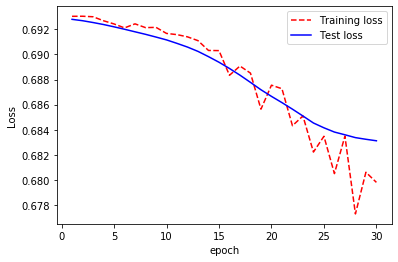

In [750]:
#plotting the loss
epoch_count = range(1,len(training_loss) +1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss,'b-')
plt.legend(['Training loss', 'Test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show();

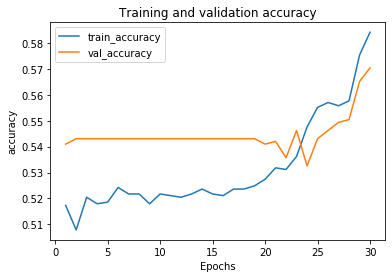

In [742]:
#plotting the accuracy
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'accuracy')

The accuracy is not high. What is more important, the recall is at 72% which means about 2/3 of the people that churned were predicted correctly. 

Below is the original Neural Network Model that overfit. I left it here to see the difference between the better model above and the model that overfit below.

In [378]:
##this is an overfitiing model. The good one is above
#importing the libraries
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras import layers
from keras import regularizers
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal',kernel_regularizer=regularizers.l2(0.0001)))#Second  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', kernel_regularizer=regularizers.l2(0.0001)))#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=4, epochs=2, validation_data = (X_test, y_test))
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Train on 2778 samples, validate on 1191 samples
Epoch 1/2
2778/2778 [==============================] - 1s 344us/step - loss: 0.6923 - accuracy: 0.5212 - val_loss: 0.6861 - val_accuracy: 0.5508
Epoch 2/2
1191/1191 [==============================] - 0s 10us/step
Test accuracy: 0.6095718145370483


In [379]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [380]:
#confusion matrix of the overfitting model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[273 282]
 [183 453]]


In [382]:
#classification report of the overfitiing model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54       555
           1       0.62      0.71      0.66       636

    accuracy                           0.61      1191
   macro avg       0.61      0.60      0.60      1191
weighted avg       0.61      0.61      0.60      1191



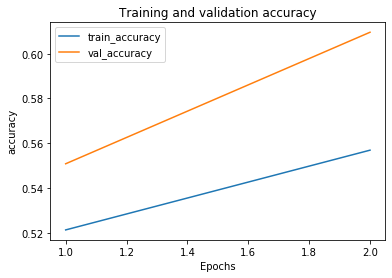

In [381]:
#plotting accuracy of the overfitting model
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'accuracy')

In [383]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

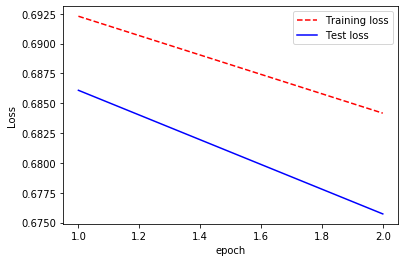

In [384]:
#plotting loss of the overfitiing model. The good one is above
epoch_count = range(1,len(training_loss) +1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss,'b-')
plt.legend(['Training loss', 'Test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show();

The plots are indicators of the model overfitting. 